In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import titanic train data
train_df = pd.read_csv('/Users/halders/Documents/Excelr/dataset/titanic/train.csv',index_col=0)

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
# replacing missing data 
train_df['Age'].fillna((train_df['Age'].mean()),inplace = True)
train_df['Embarked'].fillna('S',inplace = True)

In [6]:
# getting dummy values for Sex and Embarked
train_df['Sex'] = pd.get_dummies(train_df['Sex'])
train_df['Embarked'] = pd.get_dummies(train_df['Embarked'])

In [7]:
x_train=train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare','Embarked']]
y_train=train_df['Survived']

In [8]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.000000,1,0,7.2500,0
2,1,1,38.000000,1,0,71.2833,1
3,3,1,26.000000,0,0,7.9250,0
4,1,1,35.000000,1,0,53.1000,0
5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
887,2,0,27.000000,0,0,13.0000,0
888,1,1,19.000000,0,0,30.0000,0
889,3,1,29.699118,1,2,23.4500,0


In [9]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [10]:
train_df['Survived'].unique()

array([0, 1])

In [11]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# importing test data for titanic
test_df = pd.read_csv('/Users/halders/Documents/Excelr/dataset/titanic/test.csv',index_col=0)

In [13]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
# getting sum of total null values for test data.
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [15]:
# getting dummy values for Sex and Embarked
test_df['Sex'] = pd.get_dummies(test_df['Sex'])
test_df['Embarked'] = pd.get_dummies(test_df['Embarked'])

In [16]:
# replacing missing data 
test_df['Age'].fillna((test_df['Age'].mean()),inplace = True)
test_df['Fare'].fillna((test_df['Fare'].mean()),inplace = True)

In [17]:
x_test=test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare','Embarked']]

In [19]:
_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.50000,0,0,7.8292,0
893,3,1,47.00000,1,0,7.0000,0
894,2,0,62.00000,0,0,9.6875,0
895,3,0,27.00000,0,0,8.6625,0
896,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
1305,3,0,30.27259,0,0,8.0500,0
1306,1,1,39.00000,0,0,108.9000,1
1307,3,0,38.50000,0,0,7.2500,0


### Building Decision Tree Classifier using Entropy Criteria

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

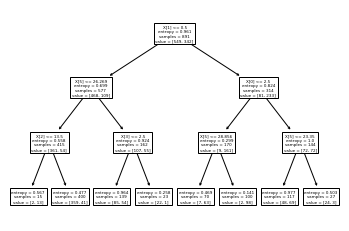

In [21]:
#PLot the decision tree
tree.plot_tree(model);


In [28]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    262
1    156
dtype: int64

In [59]:
# importing submission file for Titanic competition
gender_submission = pd.read_csv('/Users/halders/Documents/Excelr/dataset/titanic/gender_submission.csv',index_col=0)

In [60]:
gender_submission_test = pd.DataFrame(preds, columns=['Survived'])  

In [64]:
gender_submission.head

0    266
1    152
Name: Survived, dtype: int64

In [66]:
gender_submission_test.to_csv('/Users/halders/Documents/Excelr/dataset/titanic/gender_submission_index.csv')
gender_submission_test.to_csv('/Users/halders/Documents/Excelr/dataset/titanic/gender_submission_updated.csv',index = False)



### Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = train_df.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

In [ ]:
#Find the accuracy
model.score(x_test,y_test)